# stats


- 162,612 individuals
- 45,915 individuals with at least one piece of work
- 767,932 pieces of work
- 38,627 indiviudals with year + region + at least one piece of work

In [74]:
import sys

sys.path.append("../")

import pandas as pd
import numpy as np

from dotenv import load_dotenv

load_dotenv()
import os

import sqlite3

DB_PATH = os.getenv("DB_PATH")
DATA_PATH = "data"

conn = sqlite3.connect(DB_PATH)

if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

In [75]:
# Individuals' works
df_ind_works = pd.read_sql_query("SELECT * FROM individual_created_work", conn)

In [76]:
len(set(df_ind_works.individual_wikidata_id))

# 45915 individuals

45915

In [77]:
len(set(df_ind_works.work_wikidata_id))

767932

In [78]:
# Individuals Regions
df_ind_regions = pd.read_sql_query("SELECT * FROM individuals_regions", conn)

In [79]:
len(set(df_ind_regions.individual_wikidata_id))

162612

In [80]:
df_ind_regions.region_code.value_counts()

re_western_europe         132567
re_northwestern_europe    105639
re_german_world            40595
re_germany                 31871
re_france                  24550
re_eastern_europe          22087
re_southwestern_europe     19328
re_british_islands         18565
re_italy                   18041
re_united_kingdom          17508
re_north_france            15419
re_central_europe          13286
re_north_italy             12984
re_low_countries           12182
re_nordic_countries         9667
re_spain                    7715
re_netherlands              7680
re_south_france             5027
re_slav_world               4889
re_austria                  4640
re_sweden                   4607
re_belgium                  4505
re_south_italy              4163
re_switzerland              4086
re_denmark                  2761
re_ottoman_world            2721
re_mediterreanean           2209
re_muslim_world             2169
re_chinese_world            2129
re_balkans                  2040
re_greek_w

In [81]:
# Years
df_ind = pd.read_sql_query("SELECT * FROM individuals_main_information", conn)
df_ind_year = df_ind[["individual_wikidata_id", "birthyear"]].drop_duplicates()
df_ind_year = df_ind_year.dropna()
df_ind_year["decade"] = df_ind_year["birthyear"].apply(lambda x: round(x / 10) * 10)

In [82]:

df = pd.merge(
    df_ind_works, df_ind_regions, on=["individual_wikidata_id", "individual_name"]
)
df = df[
    ["individual_wikidata_id", "work_wikidata_id", "region_code", "region_name"]
].drop_duplicates()
df = pd.merge(df, df_ind_year, on="individual_wikidata_id")

#### Individuals repartition

In [83]:
df[['individual_wikidata_id', 'region_code']].drop_duplicates().region_code.value_counts()

re_western_europe         32411
re_northwestern_europe    26804
re_france                  7554
re_german_world            6742
re_british_islands         6035
re_united_kingdom          5714
re_north_france            5380
re_germany                 5321
re_low_countries           4408
re_southwestern_europe     4060
re_italy                   3803
re_eastern_europe          3674
re_north_italy             2885
re_netherlands             2693
re_central_europe          2135
re_nordic_countries        2027
re_belgium                 1719
re_spain                   1580
re_south_france            1533
re_sweden                  1050
re_slav_world               986
re_chinese_world            917
re_south_italy              770
re_switzerland              716
re_austria                  706
re_mediterreanean           689
re_muslim_world             615
re_denmark                  521
re_greek_world              520
re_japan                    503
re_arabic_world             437
re_balka

In [84]:
len(set(df.individual_wikidata_id))

38627

#### Works Repartition

In [85]:
df_region_work_id = df[['work_wikidata_id', 'region_code']].drop_duplicates()
df_region_work_id.region_code.value_counts()

re_western_europe         523622
re_northwestern_europe    461532
re_british_islands        164952
re_united_kingdom         161754
re_france                 108683
re_north_france            84090
re_low_countries           80323
re_german_world            78208
re_eastern_europe          75443
re_germany                 61626
re_netherlands             50793
re_chinese_world           47731
re_southwestern_europe     47204
re_italy                   44897
re_central_europe          39210
re_north_italy             36919
re_nordic_countries        30132
re_belgium                 29931
re_slav_world              29782
re_muslim_world            27033
re_south_china             25755
re_south_france            22986
re_arabic_world            22819
re_sweden                  17627
re_spain                   15582
re_north_china             13586
re_yangtze                 11275
re_austria                 10289
re_mediterreanean           8741
re_south_italy              7623
re_greek_w

In [86]:
df_trends_works = (
    df.groupby(["region_name", "decade"])["work_wikidata_id"]
    .count()
    .rename("cultural_score")
    .reset_index()
)
df_trends_works["log_cultural_score"] = np.log(
    1 + df_trends_works["cultural_score"]
)

df_fig = df_trends_works.copy()
df_fig['normalized_cultural_score'] = df_fig.groupby('region_name')['log_cultural_score'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df_fig = df_fig[df_fig['decade']<=1840]

In [87]:
import plotly.express as px
import plotly

fig = px.line(df_fig, x="decade", 
              y="normalized_cultural_score", 
              facet_col="region_name", 
              facet_col_wrap=6, 
              width = 2000, 
              height = 2000, 
              template = 'simple_white',
             hover_data = ['cultural_score'])


fig.update_xaxes(tickmode='linear', dtick=500)
fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True))

for region_name in df_fig['region_name'].unique():
    fig.update_xaxes(title_text='Decade', col=region_name)

plotly.offline.plot(fig)

'temp-plot.html'

In [102]:
df_trends = pd.read_csv( '../' + DATA_PATH + "/df_indi_works.csv")
df_trends = df_trends[['region_code', 'decade', 'individual_wikidata_id']].drop_duplicates()
df_trends = df_trends.groupby(['region_code', 'decade'])['individual_wikidata_id'].count().reset_index()


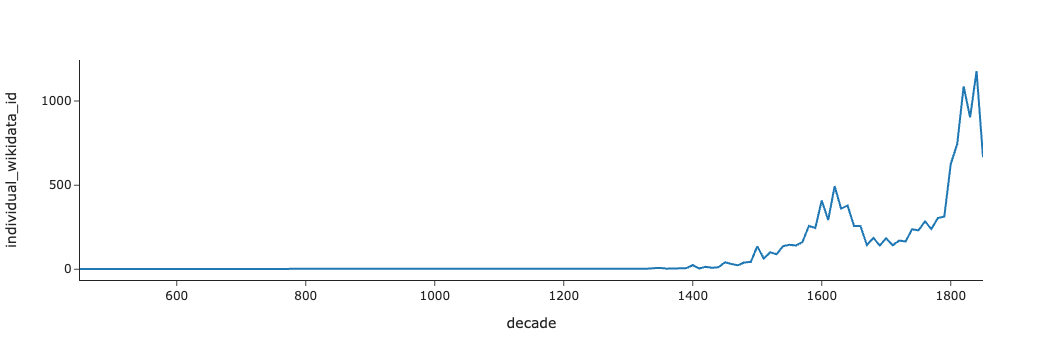

In [104]:
df_fig = df_trends[df_trends['region_code']=='re_low_countries']

px.line(df_fig, x = 'decade', y = 'individual_wikidata_id', template = 'simple_white')

In [97]:

df_trends['normalized_cultural_score'] = df_trends.groupby('region_name')['log_cultural_score'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))


fig = px.line(df_trends, 
              x="decade", 
              y="normalized_cultural_score", 
              facet_col="region_name", 
              facet_col_wrap=6, 
              width = 2000, 
              height = 2000, 
              template = 'simple_white',
             hover_data = ['cultural_score'])


fig.update_xaxes(tickmode='linear', dtick=500)
fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True))

for region_name in df_fig['region_name'].unique():
    fig.update_xaxes(title_text='Decade', col=region_name)

plotly.offline.plot(fig)

,region_code,decade,individual_wikidata_id
0,re_northwestern_europe,1800,Q100035
1,re_western_europe,1800,Q100035
2,re_german_world,1800,Q100035
3,re_germany,1800,Q100035
4,re_northwestern_europe,1840,Q1000899
...,...,...,...
571300,re_central_europe,1850,Q4228920
571301,re_western_europe,1820,Q60442324
571302,re_north_italy,1820,Q60442324
571303,re_southwestern_europe,1820,Q60442324


In [92]:
len(set(test.individual_wikidata_id))

162612